Jim's notebook on contour plots, showing projection of 2D data on top of the countour plot

In [63]:
import numpy as np
import matplotlib.pyplot as plt



In [77]:
unbiasedCVs = np.genfromtxt('NVT_monitor/COLVAR',comments='#');
biasedCVs = np.genfromtxt('MetaD/COLVAR',comments='#');
unbiasedCVsHOT = np.genfromtxt('NVT_monitor/hot/COLVAR',comments='#');


### Plotting biased and unbiased CVS

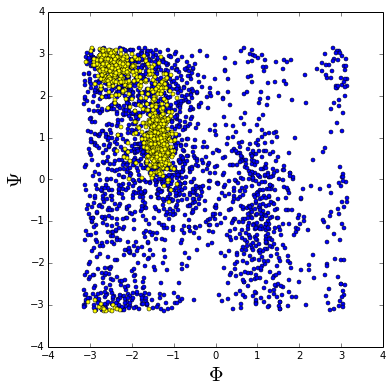

In [67]:
%matplotlib inline

fig = plt.figure(figsize=(6,6)) 
axes = fig.add_subplot(111)
stride=5
xlabel='$\Phi$'
ylabel='$\Psi$'

axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=4,linestyle='none')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=4,linestyle='none',markerfacecolor='yellow')

axes.set_xlabel(xlabel, fontsize=20)
axes.set_ylabel(ylabel, fontsize=20)


plt.show()

### Plotting contour plot of biased FES

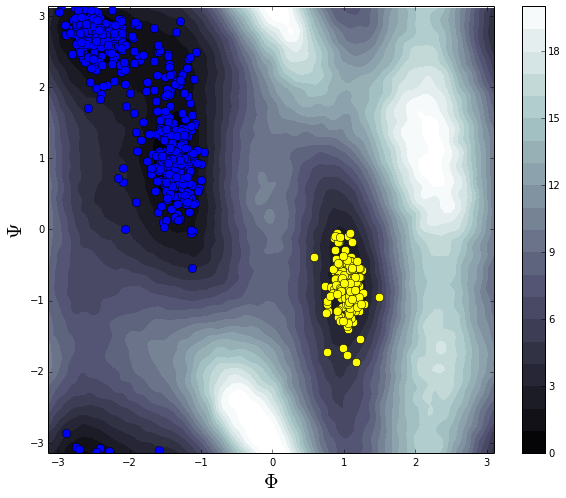

In [80]:
#read the data in from a text file 
fesdata = np.genfromtxt('MetaD/fes.dat',comments='#');

fesdata = fesdata[:,0:3]
#what was your grid size? this calculates it 
dim=int(np.sqrt(np.size(fesdata)/3))

#some post-processing to be compatible with contourf 
X=np.reshape(fesdata[:,0],[dim,dim],order="F")  #order F was 20% faster than A/C
Y=np.reshape(fesdata[:,1],[dim,dim],order="F") 
Z=np.reshape((fesdata[:,2]-np.min(fesdata[:,2]))/4.184,[dim,dim],order="F")  #convert to kcal/mol

#what spacing do you want?  assume units are in kJ/mol
spacer=1
lines=20
levels=np.linspace(0,lines*spacer,num=(lines+1),endpoint=True)


fig=plt.figure(figsize=(10,8)) 
axes = fig.add_subplot(111)


plt.contourf(X, Y, Z, levels, cmap=plt.cm.bone,)
plt.colorbar()
plt.xlabel('$\Phi$')
plt.ylabel('$\Psi$')
axes.set_xlabel(xlabel, fontsize=20)
axes.set_ylabel(ylabel, fontsize=20)


stride=10
#axes.plot(biasedCVs[::stride,1],biasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='cyan')
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='blue')
#axes.plot(unbiasedCVsHOT[::stride,1],unbiasedCVsHOT[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='red')

unbiasedCVs = np.genfromtxt('NVT_monitor/other_basin/COLVAR',comments='#');
stride=5
axes.plot(unbiasedCVs[::stride,1],unbiasedCVs[::stride,2],marker='o',markersize=8,linestyle='none',markerfacecolor='yellow')



plt.savefig('fes_bias.png')
plt.show()
